In [1]:
import pandas as pd             
import seaborn as sns           
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  

In [2]:
pd.options.display.float_format='{:0.5f}'.format

In [3]:
df =pd.read_csv('../0.data/loan_customer.csv')

# <span style="color:lightblue">1.Data 탐색</span>

In [4]:
df.columns
#sk_id_curr	대출 식별번호 
#name_contract_type	Cash loans: 일반 대출, Revolving loans: 마이너스 대출
#code_gender	성별
#flag_own_realty	자가부동산 보유 여부
#cnt_children	자녀 수
#amt_income_total	소득 금액(USD)
#amt_credit	신용대출 금액(USD)
#name_income_type	소득 유형
#name_education_type	학력
#name_family_status	결혼 상태
#name_housing_type	주거 형태
#region_population_relative	거주 지역의 표준화된 인구
#days_birth	대출 신청 시점에서의 일단위 나이(기준 시점 대비 상대적인 시간)
#days_employed	대출 신청 시점에서의 고객의 근무일수(기준 시점 대비 상대적인 시간)
#days_registration	대출 신청 이전에 고객이 등록정보를 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)
#days_id_publish	대출 신청 이전에 고객이 신분증을 변경한 시점 사이의 일수(기준 시점 대비 상대적인 시간)
#flag_mobil	휴대폰 번호 등록 여부
#flag_emp_phone	고용주 연락처 등록 여부
#flag_work_phone	직장 전화번호 등록 여부
#flag_phone	집 전화번호 등록 여부
#flag_email	이메일 주소 등록 여부
#region_rating_client	거주지 등급
#weekday_appr_process_start	대출 신청 요일
#hour_appr_process_start	대출 신청 시간대
#reg_city_not_live_city	고객의 등록지 주소와 실거주지 일치 여부
#reg_city_not_work_city	고객의 등록지 주소와 직장 주소 일치 여부
#live_city_not_work_city	고객의 실거주지와 직장 주소 일치 여부
#organization_type	근무 회사 유형
#flag_document_2	문서 2 제공 여부
#flag_document_3	문서 3 제공 여부
#flag_document_4	문서 4 제공 여부
#cb_score_1	신용점수 1
#cb_score_2	신용점수 2
#cb_score_3	신용점수 3
#target	타겟 변수 (1 - 대출 신청자 중 지정한 일수 동안 한번 이상 대출 분할 지불이 지연된 경우, 0 - 그 외의 경우)


Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET'],
      dtype='object')

In [5]:
df.shape

(24000, 35)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [7]:
target=df.loc[df.TARGET ==1]

In [8]:
print('정상은',len(df.loc[df.TARGET ==0])/len(df)*100,'%')
print('부실은',len(df.loc[df.TARGET ==1])/len(df)*100,'%')
print('Cash loans',len(df[df.NAME_CONTRACT_TYPE =='Cash loans'])/len(df)*100,'%')
print('Revolving loans',len(df[df.NAME_CONTRACT_TYPE =='Revolving loans'])/len(df)*100,'%')
print('일반부실',len(target[target.NAME_CONTRACT_TYPE =='Cash loans'])/len(target)*100,'%')
print('마이너스부실',len(target[target.NAME_CONTRACT_TYPE =='Revolving loans'])/len(target)*100,'%')

정상은 91.69583333333333 %
부실은 8.304166666666667 %
Cash loans 90.55416666666667 %
Revolving loans 9.445833333333335 %
일반부실 93.72804816859006 %
마이너스부실 6.271951831409934 %


<span style='background-color:lightblue'><font color ='black'>&rightarrow; 부도율 8.3%</font></span>|

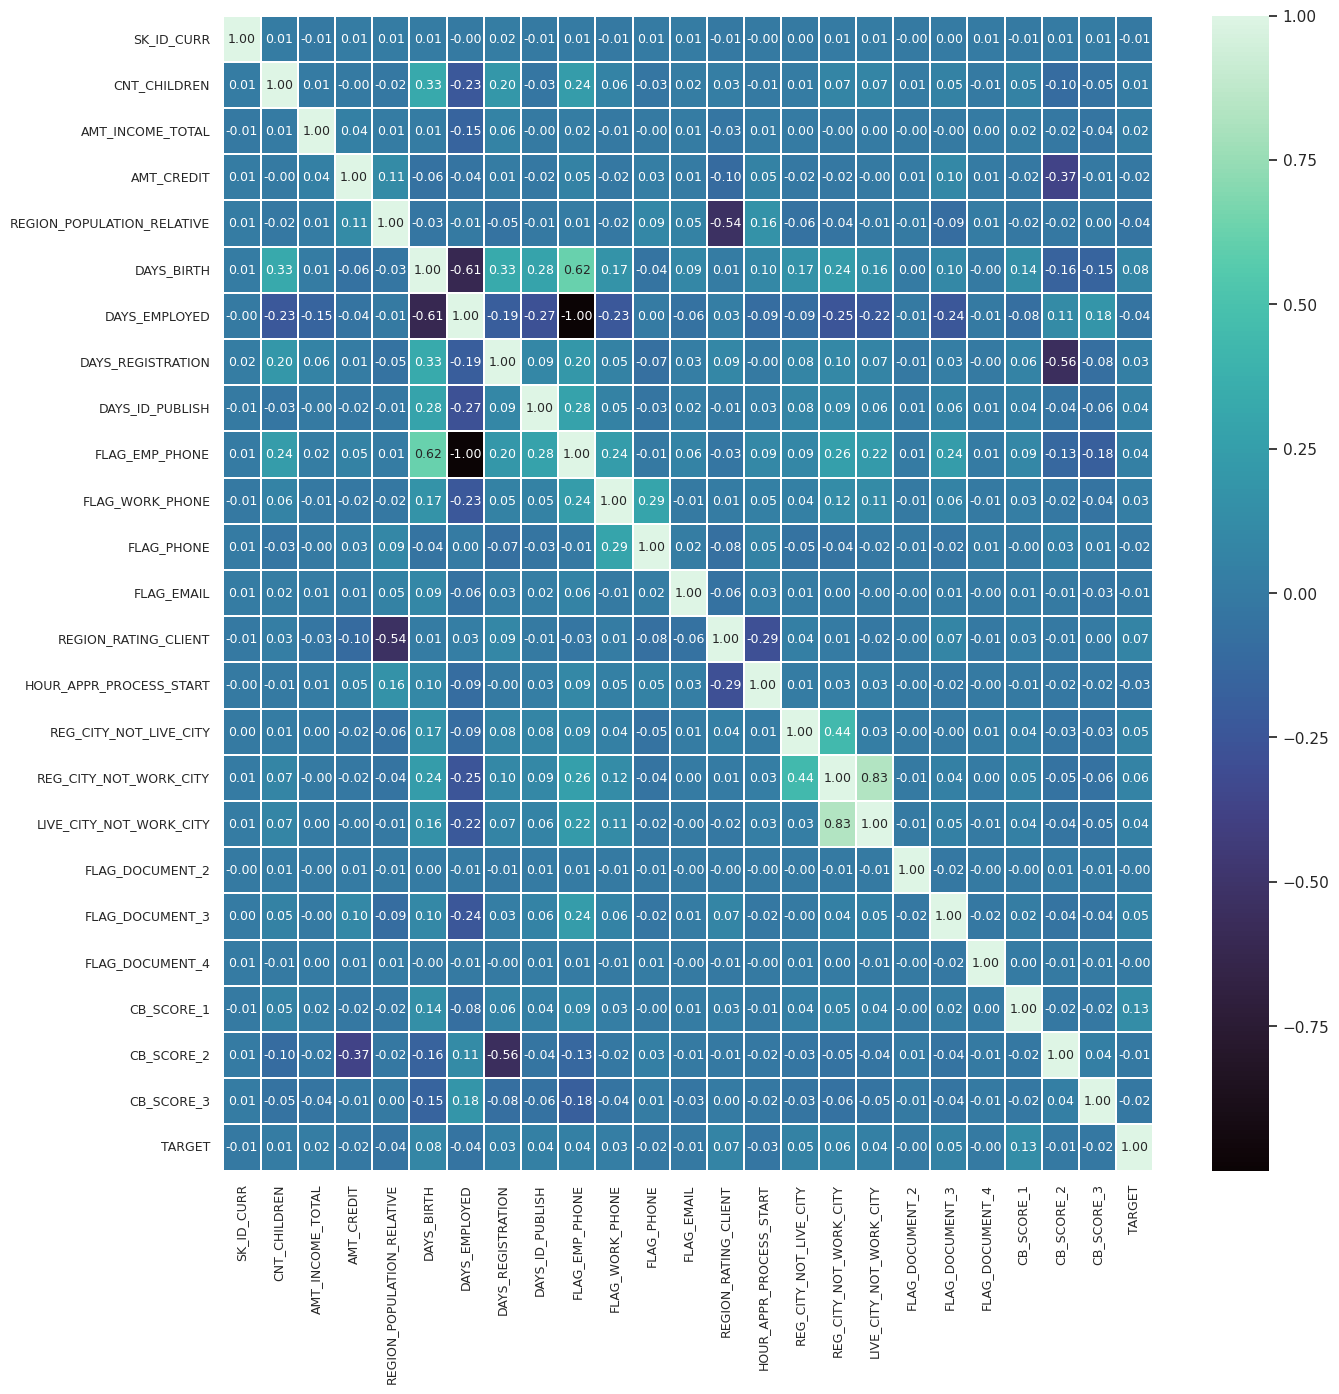

In [9]:
sns.set(style ='white')
cor = df.corr()
cor.drop('FLAG_MOBIL',axis =1,inplace=True)
cor.drop('FLAG_MOBIL',axis =0,inplace=True)

plt.figure(figsize =(15,15))
sns.heatmap(cor,annot =True,fmt='.2f',linewidths=0.1,cmap='mako',annot_kws={"size": 9})
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [10]:
def Graph1(df,col):
    tmp  = df.groupby(col).agg(totalCnt =('SK_ID_CURR','count'),
                                tarCnt   =('TARGET','sum') ).reset_index()
    tmp['tarRate'] =tmp.tarCnt/tmp.totalCnt
    
    # Bar (count value)
    x = np.arange(len(tmp))
    xlabel = tmp[col].to_list()
    
    bar = plt.bar(x=x,height=tmp["totalCnt"],width=0.5,color="skyblue",alpha=0.7, linewidth = 0)
    plt.xticks(x,labels=xlabel,fontsize=11)
    plt.yticks(fontsize=11)
    if len(xlabel)>=10: plt.locator_params(axis='x', nbins=len(xlabel)/2) # x축라벨 표시 조절

     
    # line (churn Rate)
    twinx = plt.twinx()  # 이중축 생성
    twinx.set_ylim(0,0.5)
    plot = twinx.plot(x,tmp["tarRate"].to_list(),color="black")
    plt.yticks(fontsize=11)
    for i,j in enumerate(tmp["tarRate"]):
        if j>=0.5: plt.text(x=i,y=j+0.03,s=f"{j:5.2}",ha='center',fontsize=11)

#    # 범례
    ax1_patch = mpatches.Patch(label='count',linewidth =0,color='skyblue')
    ax2_patch = mpatches.Patch(label='target_rate',linewidth = 0,color='black')
    plt.legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize = 11, loc='upper left')
#    
#    # 제목
    plt.title(col,fontsize=15)
#
#    # 배경, 격자
    plt.grid(False)  # 격자 제거
##sns.set()       # 배경 지정

In [11]:
ob =[col for col in df.columns if df[col].dtypes.name == 'object']
it =[col for col in df.columns if df[col].dtypes.name == 'int64']
its =[col for col in it if col not in ('SK_ID_CURR','TARGET')]
fl =[col for col in df.columns if df[col].dtypes.name == 'float64']
obs=ob+its

NameError: name 'np' is not defined

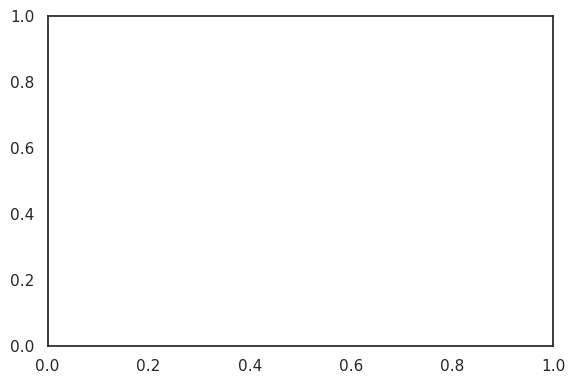

In [12]:
cols  = 4  # 열
rows  = int(len(obs) / cols) + 1 # 행

plt.subplots(figsize=(30,30))
for n, col in enumerate(obs):
    plt.subplot(rows, cols,n+1)   # 위치 
    Graph1(df,col)

In [13]:
plt.show()

In [14]:
def Graph2(df,col):
    tmp  = df.groupby(col).agg(totalCnt =('SK_ID_CURR','count'),
                                tarCnt   =('TARGET','sum') ).reset_index()
    tmp['tarRate'] =tmp.tarCnt/tmp.totalCnt
    
    # Bar (count value)
    dist =sns.distplot(df[col],color ='skyblue')


    ax1_patch = mpatches.Patch(label='count',linewidth =0,color='skyblue')
    plt.legend(handles=[ax1_patch], frameon=False, fontsize = 11, loc='upper left')
#    
#    # 제목
   # plt.title(col,fontsize=15)
#
#    # 배경, 격자
    plt.grid(False)  # 격자 제거
##sns.set()       # 배경 지정

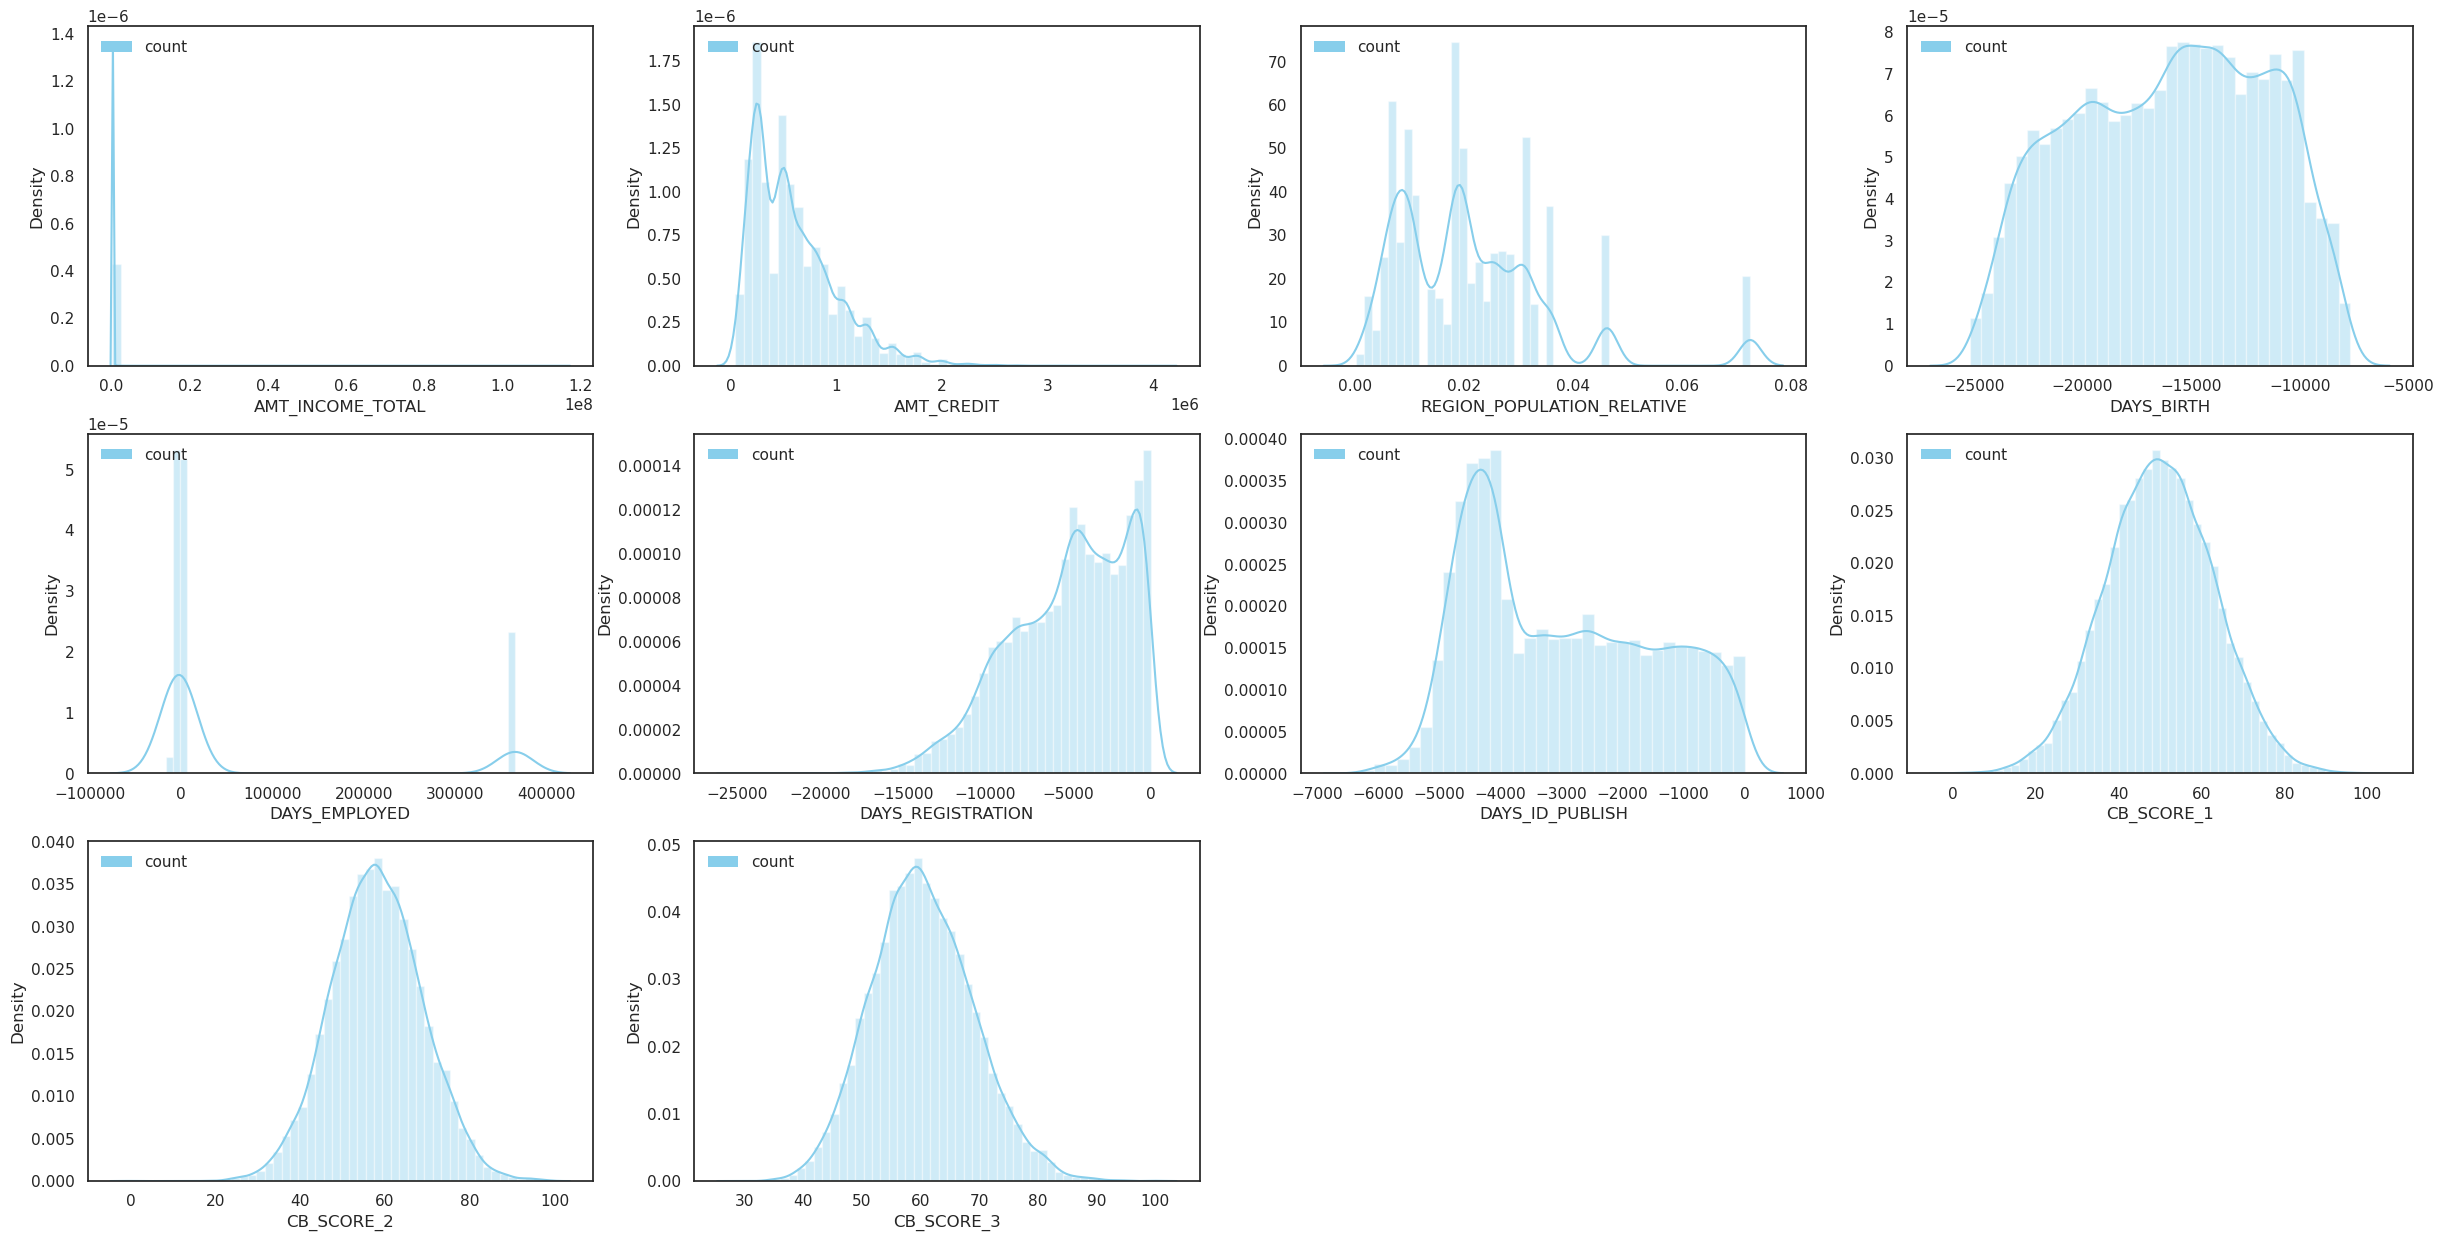

In [15]:
cols  = 4  # 열
rows  = int(len(fl) / cols) + 1 # 행
plt.subplots(figsize=(30,15))
for n, col in enumerate(fl):
    
    plt.subplot(rows, cols,n+1)   # 위치 
    Graph2(df,col)

In [16]:
plt.show()

# <span style="color:Skyblue">2.데이터변환   </span>

In [17]:
def trans_form(df):
    df['NAME_CONTRACT_TYPE'] = df.NAME_CONTRACT_TYPE.replace({'Cash loans': 1,'Revolving loans' : 0})
    
    df1 =df.loc[df.CODE_GENDER .isnull()]
    df1.loc[(df1.NAME_INCOME_TYPE == 'Commercial associate') & (df1.AMT_INCOME_TOTAL >= 200000) ,  'CODE_GENDER_'] ='M'
    df1.loc[(df1.NAME_INCOME_TYPE == 'Commercial associate') & (df1.AMT_INCOME_TOTAL < 200000)  ,  'CODE_GENDER_'] ='F'
    df1.loc[(df1.NAME_INCOME_TYPE == 'Pensioner') ,'CODE_GENDER_'] ='F'
    df1.loc[(df1.NAME_INCOME_TYPE == 'State servant') & (df1.AMT_INCOME_TOTAL >= 170000)        ,  'CODE_GENDER_'] ='M'	
    df1.loc[(df1.NAME_INCOME_TYPE == 'State servant') & (df1.AMT_INCOME_TOTAL < 170000)         ,  'CODE_GENDER_'] ='F'	
    df1.loc[(df1.NAME_INCOME_TYPE == 'Working') ,'CODE_GENDER_'] ='F'	
    df1.loc[(df1.NAME_INCOME_TYPE == 'Student') ,'CODE_GENDER_'] ='F'	
    df.loc[df.CODE_GENDER=='XNA','CODE_GENDER'] ='F'
    df1 = df1[['SK_ID_CURR','CODE_GENDER_']]
    df  = df.merge(df1, on =['SK_ID_CURR'], how ='left')
    df.loc[df.CODE_GENDER.isnull(),'CODE_GENDER'] = df1.CODE_GENDER_
    df['CODE_GENDER'] =df.CODE_GENDER.map({'F':1,'M':0})
    
    df.loc[df.NAME_FAMILY_STATUS=='Unknown','NAME_FAMILY_STATUS']    ='Widow'
    
    df2 = df[['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
    df2 = pd.get_dummies(df2)
    df  = pd.concat([df,df2],axis =1)

    df['NAME_EDUCATION_TYPE'] =df.NAME_EDUCATION_TYPE.replace({'Academic degree':5, 'Higher education':4, 'Incomplete higher':3,
       'Lower secondary':1, 'Secondary / secondary special':2})

    #df.loc[df.AMT_INCOME_TOTAL >3375000,'AMT_INCOME_TOTAL'] =3375000    
    
    imputer = KNNImputer(n_neighbors =2)
    dd =df[['AMT_CREDIT']]
    dd =imputer.fit_transform(dd)
    d =pd.DataFrame(dd,columns=['AMT_CREDIT_'])
    df =pd.concat([df,d],axis =1)
    df.drop('AMT_CREDIT', axis =1,inplace =True)

    df.REGION_POPULATION_RELATIVE.fillna(0.01885, inplace =True)  
    
    
    df['age'] =df.DAYS_BIRTH.apply(lambda x : (x*-1)/365)
    df.loc[df.DAYS_BIRTH.isnull() ,'age'] =43
    df.loc[(df.age <20) ,'AGE_BAND']  = 1
    df.loc[(df.age >19) & (df.age <30) ,'AGE_BAND']  = 2
    df.loc[(df.age >29) & (df.age <40) ,'AGE_BAND']  = 3
    df.loc[(df.age >39) & (df.age <50) ,'AGE_BAND']  = 4
    df.loc[(df.age >49) & (df.age <60) ,'AGE_BAND']  = 5
    df.loc[(df.age >59) & (df.age <70) ,'AGE_BAND']  = 6
    df.loc[(df.age >69)  ,'AGE_BAND']  = 7
    
    df.loc[df.DAYS_EMPLOYED >0          ,'DAYS_EMPLOYED']   = -2385
    df.loc[df.DAYS_EMPLOYED.isnull()    ,'DAYS_EMPLOYED']   = -2385
    df.loc[df.DAYS_ID_PUBLISH.isnull()  ,'DAYS_ID_PUBLISH'] = -2990
    
    df['DAYS_EMP']        = df.DAYS_EMPLOYED.apply(lambda x : (x*-1)/365)
    df['DAYS_ID_PUBLISH'] = df.DAYS_ID_PUBLISH.apply(lambda x :(x*-1)/365)
    
    labels =[1,2,3,4]
    df['D_EMP'] = pd.cut(df.DAYS_EMP,4,labels=labels)
    df['D_ID']  = pd.cut(df.DAYS_ID_PUBLISH,4,labels=labels)
    
   
    df.loc[(df.HOUR_APPR_PROCESS_START>=8)  & (df.HOUR_APPR_PROCESS_START<=20),  'HOUR' ] =0
    df.loc[(df.HOUR_APPR_PROCESS_START>=0)  & (df.HOUR_APPR_PROCESS_START<= 7),  'HOUR' ] =1
    df.loc[(df.HOUR_APPR_PROCESS_START>=21) & (df.HOUR_APPR_PROCESS_START<=23),  'HOUR' ] =1

    
    
    labelS =[1,2,3,4,5]
    df['CB1'] =pd.cut(df.CB_SCORE_1,5,labels =labelS)
    df['CB2'] =pd.cut(df.CB_SCORE_2,5,labels =labelS)
    df['CB3'] =pd.cut(df.CB_SCORE_3,5,labels =labelS)
    df.loc[df.CB_SCORE_1.isnull(),'CB1'] =df.CB2
    df.loc[(df.CB_SCORE_1.isnull()) & (df.CB_SCORE_2.isnull()),'CB1'] =df.CB3
    df.loc[(df.CB_SCORE_1.isnull()) & (df.CB_SCORE_2.isnull()) & (df.CB_SCORE_3.isnull()),'CB1'] =3

    
    minmax = MinMaxScaler()
    mmdf =df[['AMT_INCOME_TOTAL','AMT_CREDIT_','REGION_POPULATION_RELATIVE']]
    mm = minmax.fit_transform(mmdf)
    
    df3 =pd.DataFrame(mm, columns =['AMT_INCOME_TOTAL_','AMT_CREDIT','REGION_POPULATION_RELATIVE_'])
    df =pd.concat([df,df3],axis =1)

    df.drop(['CODE_GENDER_','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
            'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','age','DAYS_BIRTH',
            'DAYS_EMPLOYED','DAYS_EMP','DAYS_ID_PUBLISH','DAYS_REGISTRATION','FLAG_MOBIL',
            'HOUR_APPR_PROCESS_START','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3','CB2','CB3','AMT_CREDIT_']
            ,axis =1, inplace =True)  
    
    
    D_ALL =df[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'REGION_RATING_CLIENT','FLAG_PHONE', 'FLAG_EMAIL',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'TARGET', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'AGE_BAND', 'D_EMP','D_ID', 'HOUR', 'CB1', 'AMT_INCOME_TOTAL_', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE_']]
    return D_ALL

In [18]:
D_ALL =trans_form(df)

## <span style="color:Skyblue">1) 문자형 컬럼   </span>

### <span style="color:Skyblue">(1)name_contract_type   </span>

In [19]:
ntype = df.copy()

In [20]:
ntype['NAME_CONTRACT_TYPE'] = ntype.NAME_CONTRACT_TYPE.replace({'Cash loans': 1,'Revolving loans' : 0})

In [21]:
ntype.NAME_CONTRACT_TYPE.unique()
#Cash loans: 일반 대출, Revolving loans: 마이너스 대출

array([1, 0])

In [22]:
ntype.NAME_CONTRACT_TYPE.describe()

count   24000.00000
mean        0.90554
std         0.29247
min         0.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: NAME_CONTRACT_TYPE, dtype: float64

### <span style="color:Skyblue">(2) FLAG_OWN_REALTY  </span>

In [23]:
nflag  = ntype.copy()
nflag.drop('FLAG_OWN_REALTY',axis =1, inplace =True)

### <span style="color:Skyblue">(3) CODE_GENDER   </span>

In [24]:
ngen =nflag.copy()

In [25]:
pd.pivot_table(ngen,index ='CODE_GENDER',columns ='NAME_INCOME_TYPE',values ='AMT_INCOME_TOTAL',aggfunc ='mean').reset_index()

NAME_INCOME_TYPE,CODE_GENDER,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Working
0,F,NaN,185624.64853,135000.00000,136879.10507,165189.74309,562500.00000,172437.74388
1,M,180000.00000,225587.19959,360000.00000,144976.44304,215538.93134,NaN,182071.51455


In [26]:
ngen_mf =ngen.loc[ngen.CODE_GENDER .isnull()]
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'Commercial associate') & (ngen_mf.AMT_INCOME_TOTAL >= 200000) ,     'CODE_GENDER'] ='F'
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'Commercial associate') & (ngen_mf.AMT_INCOME_TOTAL < 200000)  ,     'CODE_GENDER'] ='M'
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'Pensioner') ,'CODE_GENDER'] ='M'
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'State servant') & (ngen_mf.AMT_INCOME_TOTAL >= 170000) ,'CODE_GENDER'] ='F'	
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'State servant') & (ngen_mf.AMT_INCOME_TOTAL < 170000) ,'CODE_GENDER'] ='M'	
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'Working') ,'CODE_GENDER'] ='F'	
ngen_mf.loc[(ngen_mf.NAME_INCOME_TYPE == 'Student') ,'CODE_GENDER'] ='M'	
ngen.loc[ngen.CODE_GENDER=='XNA','CODE_GENDER'] ='M'

In [27]:
ngen_mf[ngen_mf.CODE_GENDER.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET


In [28]:
ngen_mf=ngen_mf.rename(columns ={'CODE_GENDER':'CODE_GENDER_'})
ngen_mf=ngen_mf[['SK_ID_CURR','CODE_GENDER_']]
ngen=ngen.merge(ngen_mf, on =['SK_ID_CURR'], how ='left')
ngen.loc[ngen.CODE_GENDER.isnull(),'CODE_GENDER'] = ngen.CODE_GENDER_
ngen['CODE_GENDER'] =ngen.CODE_GENDER.map({'F':1,'M':0})
ngen.drop('CODE_GENDER_',axis =1,inplace =True)
ngen.CODE_GENDER.unique()

array([0, 1])

### <span style="color:Skyblue">(4) NAME_INCOME_TYPE  </span>

In [29]:
n_wo =ngen.copy()
#n_wo =n_wo[['SK_ID_CURR','NAME_INCOME_TYPE']]
n_wo[n_wo.NAME_INCOME_TYPE.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET


In [30]:
n_wo.NAME_INCOME_TYPE.unique() #7개 

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Maternity leave', 'Businessman'], dtype=object)

In [31]:
N_ta=n_wo.loc[n_wo.TARGET == 1]
nta =N_ta.groupby('NAME_INCOME_TYPE').SK_ID_CURR.count().reset_index()
ndf =n_wo.groupby('NAME_INCOME_TYPE').SK_ID_CURR.count().reset_index()
nta =nta.rename(columns ={'SK_ID_CURR':'SK_ID_CURR_ta'})
ndf_ =ndf.merge(nta,on ='NAME_INCOME_TYPE',how='left')
ndf_['ratio'] = ndf_.SK_ID_CURR_ta/ ndf_.SK_ID_CURR*100
ndf_.fillna(0)

,NAME_INCOME_TYPE,SK_ID_CURR,SK_ID_CURR_ta,ratio
0,Businessman,1,0.00000,0.00000
1,Commercial associate,5527,402.00000,7.27339
2,Maternity leave,2,0.00000,0.00000
3,Pensioner,4294,253.00000,5.89194
4,State servant,1714,87.00000,5.07585
5,Student,2,0.00000,0.00000
6,Working,12460,1251.00000,10.04013


In [32]:
nwo =n_wo[['NAME_INCOME_TYPE']]
n_oh = pd.get_dummies(nwo)
ndum=pd.concat([n_wo,n_oh],axis =1)
ndum.drop('NAME_INCOME_TYPE',axis=1, inplace=True)

### <span style="color:Skyblue">(5) NAME_EDUCATION_TYPE  </span>

In [33]:
n_edu =ndum.copy()
n_edu[n_edu.NAME_EDUCATION_TYPE.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,CB_SCORE_2,CB_SCORE_3,TARGET,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working


In [34]:
N_edu=n_edu.loc[n_edu.TARGET == 1]
ned =N_edu.groupby('NAME_EDUCATION_TYPE').SK_ID_CURR.count().reset_index()
nED =n_edu.groupby('NAME_EDUCATION_TYPE').SK_ID_CURR.count().reset_index()
N_ed =ned.rename(columns ={'SK_ID_CURR':'SK_ID_CURR_ta'})
nEDU_ =nED.merge(N_ed,on ='NAME_EDUCATION_TYPE',how='left')
nEDU_['ratio'] = nEDU_.SK_ID_CURR_ta/ nEDU_.SK_ID_CURR*100
nEDU_.fillna(0)

,NAME_EDUCATION_TYPE,SK_ID_CURR,SK_ID_CURR_ta,ratio
0,Academic degree,15,0.00000,0.00000
1,Higher education,5857,315.00000,5.37818
2,Incomplete higher,796,61.00000,7.66332
3,Lower secondary,278,26.00000,9.35252
4,Secondary / secondary special,17054,1591.00000,9.32919


In [35]:
nEDU_.NAME_EDUCATION_TYPE.unique()

array(['Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special'], dtype=object)

In [36]:
n_edu['NAME_EDUCATION_TYPE'] =n_edu.NAME_EDUCATION_TYPE.replace({'Academic degree':5, 'Higher education':4, 'Incomplete higher':3,
       'Lower secondary':1, 'Secondary / secondary special':2})

In [37]:
n_edu.NAME_EDUCATION_TYPE.unique()

array([2, 4, 3, 1, 5])

   ### <span style="color:Skyblue">(6) NAME_FAMILY STATUS  </span>

In [38]:
n_fam =n_edu.copy()
n_fam[n_fam.NAME_FAMILY_STATUS.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,CB_SCORE_2,CB_SCORE_3,TARGET,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working


In [39]:
N_fam =n_fam.groupby('NAME_FAMILY_STATUS').SK_ID_CURR.count().reset_index()
e_ta =N_edu.groupby('NAME_FAMILY_STATUS').SK_ID_CURR.count().reset_index()
e_ta=e_ta.rename(columns={'SK_ID_CURR':'SK_ID_CURR_'})
eweek =N_fam.merge(e_ta,on='NAME_FAMILY_STATUS', how ='left')
eweek['ratio'] =eweek.SK_ID_CURR_/eweek.SK_ID_CURR*100
eweek

,NAME_FAMILY_STATUS,SK_ID_CURR,SK_ID_CURR_,ratio
0,Civil marriage,2336,258.00000,11.04452
1,Married,15275,1151.00000,7.53519
2,Separated,1527,123.00000,8.05501
3,Single / not married,3557,376.00000,10.57071
4,Unknown,1,NaN,NaN
5,Widow,1304,85.00000,6.51840


In [40]:
n_fam.loc[n_fam.NAME_FAMILY_STATUS=='Unknown','NAME_FAMILY_STATUS'] ='Widow'

In [41]:
N_fam =n_fam[['NAME_FAMILY_STATUS']]
n_oo =pd.get_dummies(N_fam)
incom_F =pd.concat([n_fam,n_oo],axis=1)
incom_F.drop('NAME_FAMILY_STATUS',axis =1,inplace=True)

### <span style="color:Skyblue">(7) NAME_HOSING_TYPE  </span>

In [42]:
N_hou =incom_F.copy()
N_hou[N_hou.NAME_HOUSING_TYPE.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow


In [43]:
N_hou.groupby('NAME_HOUSING_TYPE').SK_ID_CURR.count()

NAME_HOUSING_TYPE
Co-op apartment           76
House / apartment      21213
Municipal apartment      911
Office apartment         203
Rented apartment         391
With parents            1206
Name: SK_ID_CURR, dtype: int64

In [44]:
n_hou =N_hou.groupby('NAME_HOUSING_TYPE').SK_ID_CURR.count().reset_index()
e_ta =N_edu.groupby('NAME_HOUSING_TYPE').SK_ID_CURR.count().reset_index()
e_ta=e_ta.rename(columns={'SK_ID_CURR':'SK_ID_CURR_'})
eweek =n_hou.merge(e_ta,on='NAME_HOUSING_TYPE', how ='left')
eweek['ratio'] =eweek.SK_ID_CURR_/eweek.SK_ID_CURR*100
eweek

,NAME_HOUSING_TYPE,SK_ID_CURR,SK_ID_CURR_,ratio
0,Co-op apartment,76,6,7.89474
1,House / apartment,21213,1673,7.88667
2,Municipal apartment,911,84,9.22064
3,Office apartment,203,13,6.40394
4,Rented apartment,391,58,14.83376
5,With parents,1206,159,13.18408


In [45]:
n_Hou =N_hou[['NAME_HOUSING_TYPE']]
n_oo =pd.get_dummies(n_Hou)
n_hou =pd.concat([N_hou,n_oo],axis=1)
n_hou.drop('NAME_HOUSING_TYPE',axis =1,inplace=True)

### <span style="color:Skyblue">(8) ORGANIZATION_TYPE  </span>

In [46]:
e_week =n_edu.groupby('WEEKDAY_APPR_PROCESS_START').SK_ID_CURR.count().reset_index()
e_ta =N_edu.groupby('WEEKDAY_APPR_PROCESS_START').SK_ID_CURR.count().reset_index()
e_ta=e_ta.rename(columns={'SK_ID_CURR':'SK_ID_CURR_'})
eweek =e_week.merge(e_ta,on='WEEKDAY_APPR_PROCESS_START', how ='left')
eweek['ratio'] =eweek.SK_ID_CURR_/eweek.SK_ID_CURR*100
eweek

,WEEKDAY_APPR_PROCESS_START,SK_ID_CURR,SK_ID_CURR_,ratio
0,FRIDAY,3995,332,8.31039
1,MONDAY,3977,296,7.44280
2,SATURDAY,2592,222,8.56481
3,SUNDAY,1387,106,7.64239
4,THURSDAY,3843,327,8.50898
5,TUESDAY,4135,374,9.04474
6,WEDNESDAY,4071,336,8.25350


In [47]:

e_week =n_hou.groupby('ORGANIZATION_TYPE').SK_ID_CURR.count().reset_index()
kk =n_hou.groupby('ORGANIZATION_TYPE').TARGET.sum().reset_index()
a =e_week.merge(kk, on ='ORGANIZATION_TYPE',how ='left')

a['ratio'] =a.TARGET/a.SK_ID_CURR

In [48]:
a.loc[a.ratio >  0,'O_TYPE']  =0
a.loc[a.ratio == 0,'O_TYPE']  =1

In [49]:
a=a[['ORGANIZATION_TYPE','O_TYPE']]

In [50]:
n_hou =n_hou.merge(a, on='ORGANIZATION_TYPE', how ='left')

In [51]:
# 큰 차이가 없어보이니까 버리는걸로
n_hou.drop(['WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'],axis =1, inplace =True)

In [52]:
n_hou.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Sing

## <span style="color:Skyblue">2) 수치형 컬럼  </span>

  ### <span style="color:Skyblue">(1) CNT_CHILDREN  </span>

In [53]:
n_chi =n_hou.copy()

### <span style="color:Skyblue">(2) AMT_IMCOME_TOTAL  </span>

In [54]:
n_inco =n_chi.copy()            
n_inco[n_inco.AMT_INCOME_TOTAL.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE


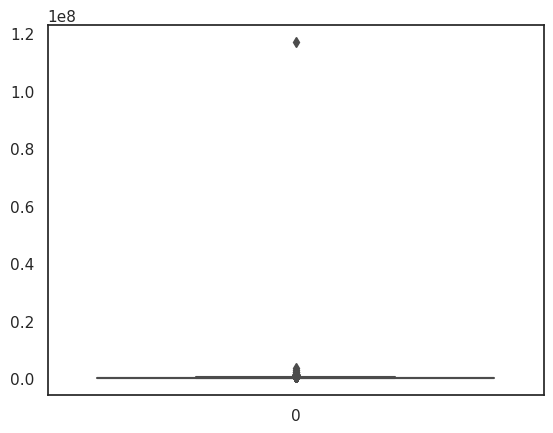

In [55]:
sns.boxplot(n_inco.AMT_INCOME_TOTAL)
plt.show()

In [56]:
n_inco.AMT_INCOME_TOTAL.describe()

count       24000.00000
mean       172518.16359
std        760460.35254
min         27000.00000
25%        112500.00000
50%        144000.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
n_inco.sort_values('AMT_INCOME_TOTAL',ascending=False)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE
991,114967,1,1,1,117000000.00000,562491.00000,2,0.01064,-12615.00000,NaN,...,0,0,0,0,1,0,0,0,0,0.00000
6480,196091,1,1,1,3375000.00000,900000.00000,4,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0.00000
8458,225210,1,0,0,2930026.50000,900000.00000,2,0.02071,-15523.00000,-3285.00000,...,0,0,0,0,1,0,0,0,0,0.00000
16180,339713,1,1,0,2250000.00000,976077.00000,4,0.01028,-22734.00000,NaN,...,1,0,0,0,1,0,0,0,0,0.00000
3064,145858,1,1,0,2025000.00000,1190340.00000,2,NaN,-17455.00000,-4226.00000,...,0,0,0,0,1,0,0,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,229012,1,1,0,27000.00000,215640.00000,2,0.01522,NaN,365243.00000,...,0,0,0,0,1,0,0,0,0,0.00000
14697,317441,1,1,0,27000.00000,360000.00000,2,0.02280,-20794.00000,365243.00000,...,0,0,0,0,1,0,0,0,0,0.00000
12778,289613,1,1,0,27000.00000,238896.00000,2,0.00213,-16653.00000,-3134.00000,...,0,0,0,0,1,0,0,0,0,0.00000
6558,197045,1,1,2,27000.00000,269550.00000,2,0.00531,-10319.00000,-2308.00000,...,0,0,0,0,1,0,0,0,0,0.00000


In [58]:
n_inco.loc[n_inco.AMT_INCOME_TOTAL >3375000,'AMT_INCOME_TOTAL'] =3375000

  ### <span style="color:Skyblue">(3) AMT_CREDIT  </span>

In [59]:
from sklearn.impute import KNNImputer

In [60]:
n_cre=n_inco.copy()
n_cre[n_cre.AMT_CREDIT.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE
0,100002,1,0,0,202500.00000,NaN,2,0.01880,-9461.00000,-637.00000,...,0,1,0,0,1,0,0,0,0,0.00000
3,100029,1,0,2,135000.00000,NaN,2,0.02639,-11286.00000,-746.00000,...,0,0,0,0,1,0,0,0,0,0.00000
12,100149,1,0,0,171000.00000,NaN,2,NaN,-9203.00000,-481.00000,...,0,0,0,0,1,0,0,0,0,0.00000
16,100201,1,1,1,180000.00000,NaN,4,0.03579,-12147.00000,NaN,...,0,1,0,0,1,0,0,0,0,0.00000
18,100229,1,1,0,157500.00000,NaN,2,0.01015,-17947.00000,-5025.00000,...,0,0,0,0,1,0,0,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23987,455918,0,1,0,72000.00000,NaN,4,0.00312,-10668.00000,NaN,...,0,1,0,0,1,0,0,0,0,0.00000
23988,455935,1,0,0,157500.00000,NaN,2,NaN,-18454.00000,-1599.00000,...,0,0,0,0,1,0,0,0,0,0.00000
23993,456018,1,1,1,310500.00000,NaN,2,0.04622,-16091.00000,-184.00000,...,0,0,0,0,1,0,0,0,0,0.00000
23995,456095,1,0,0,135000.00000,NaN,4,NaN,-19105.00000,365243.00000,...,0,0,0,0,1,0,0,0,0,0.00000


In [61]:
imputer = KNNImputer(n_neighbors =2)
dd =n_cre[['AMT_CREDIT']]
dd =imputer.fit_transform(dd)
d =pd.DataFrame(dd,columns=['AMT_CREDIT_'])
n_cre =pd.concat([n_cre,d],axis =1)
n_cre.drop('AMT_CREDIT', axis =1,inplace =True)


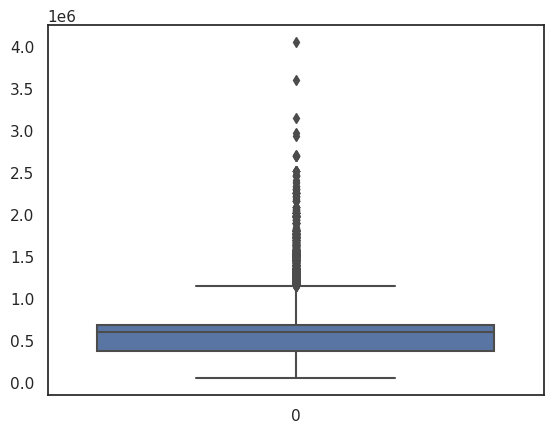

In [62]:
sns.boxplot(n_cre.AMT_CREDIT_)
plt.show()

In [63]:
n_cre[n_cre.AMT_CREDIT_.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE,AMT_CREDIT_


### <span style="color:Skyblue">(4) REGION_POPULATION_RELATIVE  </span>

In [64]:
n_reg =n_cre.copy()

In [65]:
n_reg[n_reg.REGION_POPULATION_RELATIVE.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE,AMT_CREDIT_
1,100004,0,1,0,67500.00000,2,NaN,-19046.00000,NaN,-4260.00000,...,1,0,0,1,0,0,0,0,0.00000,135000.00000
8,100102,1,1,1,126000.00000,2,NaN,NaN,-192.00000,-6913.00000,...,1,0,0,1,0,0,0,0,0.00000,327024.00000
12,100149,1,0,0,171000.00000,2,NaN,-9203.00000,-481.00000,-1642.00000,...,0,0,0,1,0,0,0,0,0.00000,595425.42728
13,100161,1,1,0,90000.00000,2,NaN,-16219.00000,-2599.00000,-9329.00000,...,0,0,0,1,0,0,0,0,0.00000,370629.00000
26,100333,1,1,0,382500.00000,3,NaN,-10442.00000,-864.00000,NaN,...,0,0,0,1,0,0,0,0,0.00000,450000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23983,455837,1,1,0,157500.00000,2,NaN,-18347.00000,NaN,-4052.00000,...,0,0,0,1,0,0,0,0,0.00000,521280.00000
23988,455935,1,0,0,157500.00000,2,NaN,-18454.00000,-1599.00000,NaN,...,0,0,0,1,0,0,0,0,0.00000,595425.42728
23991,456012,1,1,0,157500.00000,2,NaN,-18920.00000,-6529.00000,-3999.00000,...,0,0,0,1,0,0,0,0,0.00000,508495.50000
23995,456095,1,0,0,135000.00000,4,NaN,-19105.00000,365243.00000,NaN,...,0,0,0,1,0,0,0,0,0.00000,595425.42728


In [66]:
n_reg.REGION_POPULATION_RELATIVE.describe()

count   16851.00000
mean        0.02099
std         0.01406
min         0.00029
25%         0.01001
50%         0.01885
75%         0.02866
max         0.07251
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [67]:
n_reg.REGION_POPULATION_RELATIVE.fillna(0.01885, inplace =True)

  ### <span style="color:Skyblue">(5) DAY_BIRTH  </span>

In [68]:
n_bir =n_reg.copy()

In [69]:
n_bir['age'] =n_bir.DAYS_BIRTH.apply(lambda x : (x*-1)/365)
n_bir.loc[n_bir.DAYS_BIRTH.isnull() ,'age'] =43
n_bir.loc[(n_bir.age <20) ,'AGE_BAND']  = 1
n_bir.loc[(n_bir.age >19) & (n_bir.age <30) ,'AGE_BAND']  = 2
n_bir.loc[(n_bir.age >29) & (n_bir.age <40) ,'AGE_BAND']  = 3
n_bir.loc[(n_bir.age >39) & (n_bir.age <50) ,'AGE_BAND']  = 4
n_bir.loc[(n_bir.age >49) & (n_bir.age <60) ,'AGE_BAND']  = 5
n_bir.loc[(n_bir.age >59) & (n_bir.age <70) ,'AGE_BAND']  = 6
n_bir.loc[(n_bir.age >69)  ,'AGE_BAND']  = 7
n_bir.age.describe()

count   24000.00000
mean       43.72857
std        10.71728
min        21.06301
25%        36.41370
50%        43.00000
75%        51.15479
max        69.03288
Name: age, dtype: float64

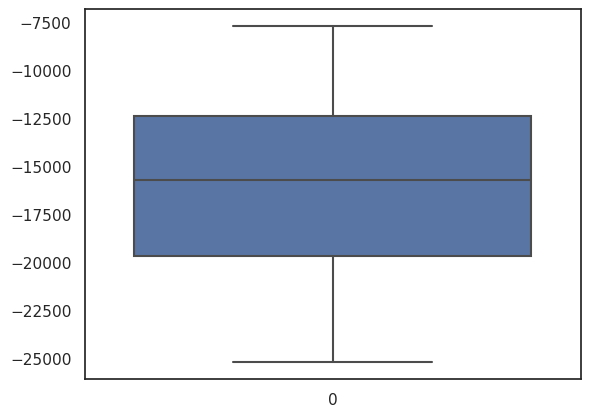

In [70]:
sns.boxplot(n_bir.DAYS_BIRTH)
plt.show()

In [71]:
n_bir.AGE_BAND.isnull().sum()


0

### <span style="color:Skyblue">(6) DAY_EMPLOYED  </span>

In [72]:
n_emp =n_bir.copy()
n_emp[n_emp.DAYS_EMPLOYED.isnull()]
print(n_emp.DAYS_EMPLOYED.min())
print(n_emp.DAYS_EMPLOYED.max())
#n_emp.drop(['DAYS_EMPLOYED'],axis =1,inplace=True)

-16852.0
365243.0


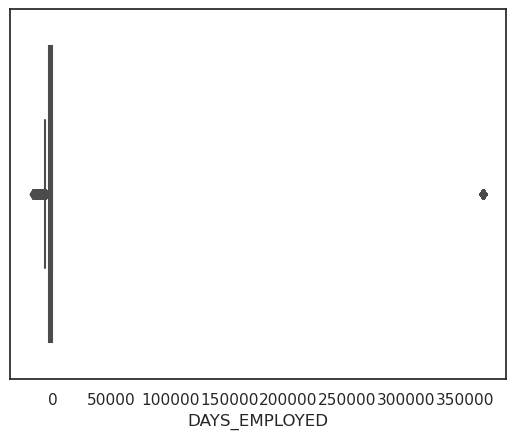

In [73]:
sns.boxplot(data =n_emp,x ='DAYS_EMPLOYED')
plt.show()

In [74]:
n_emp.DAYS_EMPLOYED.describe()

count    16851.00000
mean     63041.86511
std     140634.05133
min     -16852.00000
25%      -2772.00000
50%      -1206.00000
75%       -299.00000
max     365243.00000
Name: DAYS_EMPLOYED, dtype: float64

In [75]:
nn =n_emp.loc[n_emp.DAYS_EMPLOYED <0 ]
nn.DAYS_EMPLOYED.describe()

count    13852.00000
mean     -2385.59688
std       2342.24984
min     -16852.00000
25%      -3184.00000
50%      -1650.00000
75%       -769.00000
max         -9.00000
Name: DAYS_EMPLOYED, dtype: float64

In [76]:
n_emp.loc[n_emp.DAYS_EMPLOYED >0 ,'DAYS_EMPLOYED'] = -2385
n_emp.loc[n_emp.DAYS_EMPLOYED.isnull() ,'DAYS_EMPLOYED'] = -2385
n_emp['DAYS_EMP'] =n_emp.DAYS_EMPLOYED.apply(lambda x : (x*-1)/365)
labels =[1,2,3,4]
n_emp['D_EMP']=pd.cut(n_emp.DAYS_EMP,4,labels=labels)

In [77]:
n_emp.D_EMP.value_counts()

1    21794
2     1785
3      364
4       57
Name: D_EMP, dtype: int64

In [78]:
n_emp.D_EMP.isnull().sum()

0

In [79]:
n_emp.drop(['DAYS_EMPLOYED','DAYS_BIRTH','age'],axis =1,inplace =True)

### <span style="color:Skyblue">(7) DAYS_REGISTRATION  </span>

In [80]:
print(len(n_emp[n_emp.DAYS_REGISTRATION.isnull()] )/len(n_emp))

0.4055416666666667


In [81]:
#결측치가 너무 많아 버림
n_emp.drop(['DAYS_REGISTRATION'],axis =1,inplace=True)

### <span style="color:Skyblue">(8) DAYS_ID_PUBLISH  </span>

In [82]:
print(len(n_emp[n_emp.DAYS_ID_PUBLISH.isnull()] )/len(n_emp))

0.19754166666666667


In [83]:
n_id =n_emp.copy()

In [84]:
print(n_id.DAYS_ID_PUBLISH.min())
print(n_id.DAYS_ID_PUBLISH.max())

-6263.0
0.0


In [85]:

n_id[['DAYS_ID_PUBLISH']].describe()

,DAYS_ID_PUBLISH
count,19259.00000
mean,-2990.49193
std,1513.08998
min,-6263.00000
25%,-4308.00000
50%,-3251.00000
75%,-1717.50000
max,0.00000


In [86]:
n_id.loc[n_id.DAYS_ID_PUBLISH.isnull(), 'DAYS_ID_PUBLISH'] = -2990
n_id['DAYS_ID_PUBLISH'] =n_id.DAYS_ID_PUBLISH.apply(lambda x :(x*-1)/365)
labels =[1,2,3,4]
n_id['D_ID']=pd.cut(n_id.DAYS_ID_PUBLISH,4,labels=labels)

In [87]:
n_id.D_ID.unique()

[2, 3, 1, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [88]:
nn_id =n_id[['SK_ID_CURR','D_ID']]
nn_id.groupby('D_ID').SK_ID_CURR.count()

D_ID
1    4393
2    9599
3    7915
4    2093
Name: SK_ID_CURR, dtype: int64

In [89]:
n_Tid =n_id.loc[n_id.TARGET ==1]
n_Tid =n_Tid[['SK_ID_CURR','D_ID']]
n_Tid.groupby('D_ID').SK_ID_CURR.count()

D_ID
1    430
2    841
3    585
4    137
Name: SK_ID_CURR, dtype: int64

In [90]:
n_id.drop('DAYS_ID_PUBLISH',axis= 1,inplace=True)

### <span style="color:Skyblue">(9) FLAG_MOBIL,EMP,WORK,PHONE,EMIAL  </span>

In [91]:
n_df =n_id.copy()

In [92]:
print(len(n_df.loc[n_df.FLAG_MOBIL.isnull()])/len(n_df))
print(len(n_df.loc[n_df.FLAG_EMP_PHONE.isnull()])/len(n_df))
print(len(n_df.loc[n_df.FLAG_WORK_PHONE.isnull()])/len(n_df))
print(len(n_df.loc[n_df.FLAG_PHONE.isnull()])/len(n_df))
print(len(n_df.loc[n_df.FLAG_EMAIL.isnull()])/len(n_df))


0.0
0.0
0.0
0.0
0.0


In [93]:
n_df.loc[n_df.FLAG_MOBIL !=1]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE,AMT_CREDIT_,AGE_BAND,DAYS_EMP,D_EMP,D_ID


FLAG_MOBIL 전부 1일이니까 버림..

In [94]:
n_df.drop('FLAG_MOBIL',axis =1,inplace=True)

### <span style="color:Skyblue">(10) HOUR_APPR  </span>

In [95]:
n_hou =n_df.copy()
n_hou.loc[n_hou.HOUR_APPR_PROCESS_START.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE,AMT_CREDIT_,AGE_BAND,DAYS_EMP,D_EMP,D_ID


In [96]:
n_Tw =n_hou.loc[n_hou.TARGET ==1]
a =n_hou.groupby('HOUR_APPR_PROCESS_START').SK_ID_CURR.count().reset_index()
b =n_Tw.groupby('HOUR_APPR_PROCESS_START').SK_ID_CURR.count().reset_index()
b =b.rename(columns ={'SK_ID_CURR':'SK_ID_CURR_'})
ab =a.merge(b,on ='HOUR_APPR_PROCESS_START',how='left')
ab['c'] =ab.SK_ID_CURR_/ab.SK_ID_CURR
ab

,HOUR_APPR_PROCESS_START,SK_ID_CURR,SK_ID_CURR_,c
0,0,4,1.00000,0.25000
1,1,6,NaN,NaN
2,2,20,2.00000,0.10000
3,3,93,6.00000,0.06452
4,4,144,9.00000,0.06250
5,5,295,33.00000,0.11186
6,6,444,56.00000,0.12613
7,7,729,87.00000,0.11934
8,8,1146,99.00000,0.08639
9,9,2140,186.00000,0.08692


In [97]:
n_hou.loc[(n_hou.HOUR_APPR_PROCESS_START>=8) & (n_hou.HOUR_APPR_PROCESS_START<=20),  'HOUR' ] =0
n_hou.loc[(n_hou.HOUR_APPR_PROCESS_START>=0) & (n_hou.HOUR_APPR_PROCESS_START<=7),   'HOUR' ] =1
n_hou.loc[(n_hou.HOUR_APPR_PROCESS_START>=21) & (n_hou.HOUR_APPR_PROCESS_START<=23), 'HOUR' ] =1
n_hou.drop('HOUR_APPR_PROCESS_START',axis =1,inplace =True)

In [98]:
n_hou.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'REGION_POPULATION_RELATIVE',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
   

### <span style="color:Skyblue">(11) 나머지...  </span>

In [99]:
n_reg =n_hou.copy()
n_reg.loc[n_reg.REGION_RATING_CLIENT.isnull()]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,...,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,O_TYPE,AMT_CREDIT_,AGE_BAND,DAYS_EMP,D_EMP,D_ID,HOUR


In [100]:
n_reg.REGION_RATING_CLIENT.describe()

count   24000.00000
mean        2.05183
std         0.51152
min         1.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         3.00000
Name: REGION_RATING_CLIENT, dtype: float64

### <span style="color:Skyblue">(12) CB_SCORE  </span>

In [101]:
print(len(n_reg.loc[n_reg.CB_SCORE_1.isnull()])/len(n_reg))
print(len(n_reg.loc[n_reg.CB_SCORE_2.isnull()])/len(n_reg))
print(len(n_reg.loc[n_reg.CB_SCORE_3.isnull()])/len(n_reg))

0.25608333333333333
0.34475
0.2961666666666667


In [102]:
n_cb =n_reg.copy()

In [103]:
label =[1,2,3,4,5]
n_cb['CB1'] =pd.cut(n_cb.CB_SCORE_1,5,labels =label)
n_cb['CB2'] =pd.cut(n_cb.CB_SCORE_2,5,labels =label)
n_cb['CB3'] =pd.cut(n_cb.CB_SCORE_3,5,labels =label)
n_cb.loc[n_cb.CB_SCORE_1.isnull(),'CB1'] =n_cb.CB2
n_cb.loc[(n_cb.CB_SCORE_1.isnull()) & (n_cb.CB_SCORE_2.isnull()),'CB1'] =n_cb.CB3
n_cb.loc[(n_cb.CB_SCORE_1.isnull()) & (n_cb.CB_SCORE_2.isnull()) & (n_cb.CB_SCORE_3.isnull()),'CB1'] =3

In [104]:
n_cb.CB1.describe()

count     24000
unique        5
top           3
freq      13288
Name: CB1, dtype: int64

In [105]:
n_cb.drop(['CB_SCORE_1','CB_SCORE_2','CB_SCORE_3','CB2','CB3'],axis =1,inplace =True)

### <span style="color:Skyblue">(13) 정규화  </span>

In [106]:
n_df =n_cb.copy()

In [107]:
n_mm =n_df[['AMT_INCOME_TOTAL','AMT_CREDIT_','REGION_POPULATION_RELATIVE']]
minmax = MinMaxScaler()
mm = minmax.fit_transform(n_mm)

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
minmax = MinMaxScaler()
mm = minmax.fit_transform(n_mm)

In [110]:
n_nor =pd.DataFrame(mm, columns =['AMT_INCOME_TOTAL_','AMT_CREDIT','REGION_POPULATION_RELATIVE_'])
ndf =pd.concat([n_df,n_nor],axis =1)
ndf.drop('AMT_CREDIT_',axis=1,inplace=True)

In [111]:
D_ALL =ndf[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN',
       'NAME_EDUCATION_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'REGION_RATING_CLIENT','FLAG_PHONE', 'FLAG_EMAIL',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'TARGET', 'NAME_INCOME_TYPE_Businessman',
       'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'AGE_BAND', 'D_EMP','D_ID', 'HOUR', 'CB1', 'AMT_INCOME_TOTAL_', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE_']]

# <span style="color:Skyblue">3. 데이터나누기  </span>

In [112]:
y =D_ALL[['TARGET']]
X =D_ALL.drop('TARGET',axis =1)

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

# <span style="color:Skyblue">4. MODEL적용  </span>

## <span style="color:darkblue">1) LogisticRegression  </span>

In [114]:
lg_model =LogisticRegression(random_state =100)
lg_model.fit(X_train,y_train)

LogisticRegression(random_state=100)

In [115]:
pred = lg_model.predict(X_test)

In [116]:
y_score =lg_model.predict_proba(X_test)[:,1]

In [117]:
fpr,tpr,_=roc_curve(y_test,y_score)
roc_auc =auc(fpr,tpr)
roc_auc

0.6790464464593818

## <span style="color:darkblue">2) LGBMClassifier  </span>

In [118]:
evals =[(X_test,y_test)]
lgbm = LGBMClassifier(n_estimators =100,
                      objective='binary',
                      metric ='auc')
lgbm.fit(X_train,y_train,
         early_stopping_rounds =30, eval_metric ='logloss', eval_set =evals,
        verbose=True)

[1]	valid_0's binary_logloss: 0.274326	valid_0's auc: 0.601874
[2]	valid_0's binary_logloss: 0.273014	valid_0's auc: 0.616471
[3]	valid_0's binary_logloss: 0.271796	valid_0's auc: 0.627986
[4]	valid_0's binary_logloss: 0.270857	valid_0's auc: 0.635624
[5]	valid_0's binary_logloss: 0.270294	valid_0's auc: 0.635557
[6]	valid_0's binary_logloss: 0.269538	valid_0's auc: 0.637969
[7]	valid_0's binary_logloss: 0.269098	valid_0's auc: 0.640015
[8]	valid_0's binary_logloss: 0.268656	valid_0's auc: 0.640672
[9]	valid_0's binary_logloss: 0.268279	valid_0's auc: 0.641491
[10]	valid_0's binary_logloss: 0.267754	valid_0's auc: 0.645762
[11]	valid_0's binary_logloss: 0.267206	valid_0's auc: 0.648868
[12]	valid_0's binary_logloss: 0.266963	valid_0's auc: 0.649533
[13]	valid_0's binary_logloss: 0.266848	valid_0's auc: 0.648722
[14]	valid_0's binary_logloss: 0.266734	valid_0's auc: 0.648402
[15]	valid_0's binary_logloss: 0.266506	valid_0's auc: 0.649189
[16]	valid_0's binary_logloss: 0.266281	valid_0's

LGBMClassifier(metric='auc', objective='binary')

In [119]:
predpro= lgbm.predict_proba(X_test)[:,1]
roc_auc_score(y_test,predpro)

0.6551130829737793

In [120]:
auc

<function sklearn.metrics._ranking.auc(x, y)>

In [121]:
from lightgbm import plot_importance

<Figure size 1500x2000 with 0 Axes>

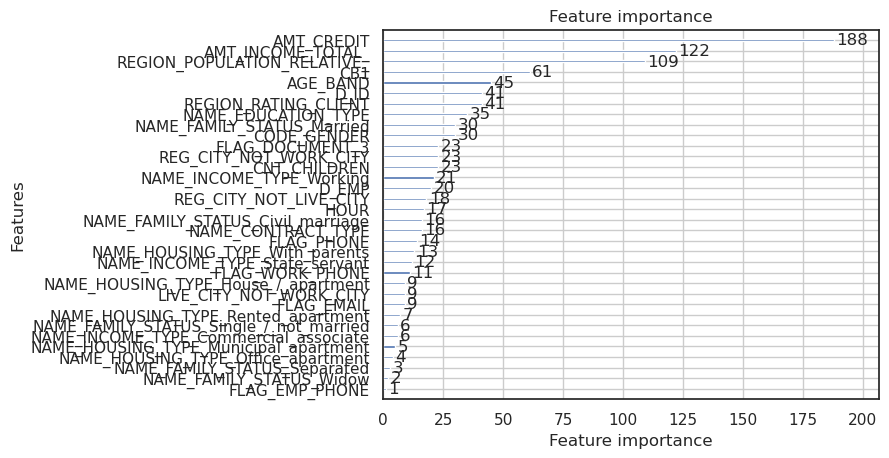

In [122]:
plt.figure(figsize =(15,20))
plot_importance(lgbm)
plt.show()

## <span style="color:darkblue">3) Decision Tree  </span>

In [123]:
dt =DecisionTreeClassifier(random_state =42)
dt.fit(X_train,y_train)
y_dt= dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_dt)

0.5049915765089894

# <span style="color:Skyblue">5. Hidden Data 적용 함수   </span>

In [124]:
def tran(df):
    df['NAME_CONTRACT_TYPE']  = df.NAME_CONTRACT_TYPE.replace({'Cash loans': 1,'Revolving loans' : 0})     
    df['CODE_GENDER']         = df.CODE_GENDER.map({'F':1,'M':0})
    df['NAME_EDUCATION_TYPE'] = df.NAME_EDUCATION_TYPE.replace({'Academic degree':5, 'Higher education':4, 'Incomplete higher':3,
                                'Lower secondary':1, 'Secondary / secondary special':2})
    df.loc[df.NAME_FAMILY_STATUS=='Unknown','NAME_FAMILY_STATUS']    ='Widow'
    nIt =df[['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']]
    NIT =pd.get_dummies(nIt)
    df  =pd.concat([df,NIT],axis =1)

    df.loc[df.AMT_INCOME_TOTAL >3375000,'AMT_INCOME_TOTAL'] =3375000  
    
    imputer = KNNImputer(n_neighbors =2)
    dd =df[['AMT_CREDIT']]
    dd =imputer.fit_transform(dd)
    d =pd.DataFrame(dd,columns=['AMT_CREDIT_'])   
    df =pd.concat([df,d],axis =1)
    df.drop('AMT_CREDIT',axis =1,inplace=True)
    
    df['age'] =df.DAYS_BIRTH.apply(lambda x : (x*-1)/365)
    df.loc[(df.age <20) ,'AGE_BAND']  = 1
    df.loc[(df.age >19) & (df.age <30) ,'AGE_BAND']  = 2
    df.loc[(df.age >29) & (df.age <40) ,'AGE_BAND']  = 3
    df.loc[(df.age >39) & (df.age <50) ,'AGE_BAND']  = 4
    df.loc[(df.age >49) & (df.age <60) ,'AGE_BAND']  = 5
    df.loc[(df.age >59) & (df.age <70) ,'AGE_BAND']  = 6
    df.loc[(df.age >69)  ,'AGE_BAND']  = 7  
    
    
    df.loc[df.DAYS_EMPLOYED > 0 ,'DAYS_EMPLOYED'] = -2385
    df['DAYS_EMP'] =df.DAYS_EMPLOYED.apply(lambda x : (x*-1)/365)    
    df['DAYS_ID_PUBLISH'] =df.DAYS_ID_PUBLISH.apply(lambda x :(x*-1)/365)    
    labels =[1,2,3,4]
    df['D_EMD']=pd.cut(df.DAYS_EMP,       4,labels=labels)
    df['D_ID'] =pd.cut(df.DAYS_ID_PUBLISH,4,labels=labels)
    
    df.loc[(df.HOUR_APPR_PROCESS_START>=8)  & (df.HOUR_APPR_PROCESS_START<=20),  'HOUR' ] =0
    df.loc[(df.HOUR_APPR_PROCESS_START>=0)  & (df.HOUR_APPR_PROCESS_START<=7),   'HOUR' ] =1
    df.loc[(df.HOUR_APPR_PROCESS_START>=21) & (df.HOUR_APPR_PROCESS_START<=23),  'HOUR' ] =1
   
    labelS =[1,2,3,4,5]
    df['CB1'] =pd.cut(df.CB_SCORE_1,5,labels =labelS)
    df['CB2'] =pd.cut(df.CB_SCORE_2,5,labels =labelS)
    df['CB3'] =pd.cut(df.CB_SCORE_3,5,labels =labelS)   
    df.loc[ df.CB_SCORE_1.isnull(),'CB1'] =df.CB2
    df.loc[(df.CB_SCORE_1.isnull()) & (df.CB_SCORE_2.isnull()),'CB1'] =df.CB3
    df.loc[(df.CB_SCORE_1.isnull()) & (df.CB_SCORE_2.isnull()) & (df.CB_SCORE_3.isnull()),'CB1'] =3
    
    minmax = MinMaxScaler()
    n_mm =df[['AMT_INCOME_TOTAL','AMT_CREDIT_','REGION_POPULATION_RELATIVE']]    
    mm = minmax.fit_transform(n_mm)    
    n_MinMax =pd.DataFrame(mm, columns =['AMT_INCOME_TOTAL_','AMT_CREDIT','REGION_POPULATION_RELATIVE_'])    
    df = pd.concat([df,n_MinMax], axis =1)

    df.drop(['NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
            'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','age',
            'DAYS_EMPLOYED','DAYS_EMP','DAYS_ID_PUBLISH','DAYS_REGISTRATION','FLAG_MOBIL',
            'HOUR_APPR_PROCESS_START','CB_SCORE_1','CB_SCORE_2','CB_SCORE_3','CB2','CB3','AMT_CREDIT_']
            ,axis =1, inplace =True)  
    
    df = df[['NAME_CONTRACT_TYPE', 'CODE_GENDER','CNT_CHILDREN',
        'NAME_EDUCATION_TYPE','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
        'REGION_RATING_CLIENT', 'FLAG_PHONE', 'FLAG_EMAIL', 
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 
        'FLAG_DOCUMENT_4', 'TARGET','NAME_INCOME_TYPE_Businessman',
        'NAME_INCOME_TYPE_Commercial associate',
        'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
        'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
        'NAME_INCOME_TYPE_Working', 'NAME_FAMILY_STATUS_Civil marriage',
        'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
        'NAME_FAMILY_STATUS_Single / not married', 
        'NAME_FAMILY_STATUS_Widow', 'NAME_HOUSING_TYPE_Co-op apartment',
        'NAME_HOUSING_TYPE_House / apartment',
        'NAME_HOUSING_TYPE_Municipal apartment',
        'NAME_HOUSING_TYPE_Office apartment',
        'NAME_HOUSING_TYPE_Rented apartment',  'NAME_HOUSING_TYPE_With parents',
        'AGE_BAND', 'D_EMD', 'D_ID','HOUR', 'CB1','AMT_INCOME_TOTAL_', 'AMT_CREDIT',
        'REGION_POPULATION_RELATIVE_']]

    return df

In [125]:
tran(df)

,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,NAME_EDUCATION_TYPE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,REGION_RATING_CLIENT,FLAG_PHONE,FLAG_EMAIL,REG_CITY_NOT_LIVE_CITY,...,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,AGE_BAND,D_EMD,D_ID,HOUR,CB1,AMT_INCOME_TOTAL_,AMT_CREDIT,REGION_POPULATION_RELATIVE_
0,1,0.00000,0,2,1,0,2,1,0,0,...,0,0,2.00000,1,2,0.00000,3,0.05242,0.13743,0.25632
1,0,NaN,0,2,1,1,2,1,0,0,...,0,0,5.00000,NaN,2,0.00000,2,0.01210,0.02247,NaN
2,1,0.00000,0,2,1,0,2,0,0,1,...,0,0,3.00000,NaN,3,0.00000,4,0.02419,0.11601,0.25401
3,1,0.00000,2,2,1,0,2,0,0,0,...,0,0,3.00000,1,NaN,0.00000,5,0.03226,0.13743,0.36143
4,1,NaN,0,2,1,0,2,1,0,0,...,0,0,NaN,1,1,0.00000,4,0.05242,0.13961,0.12303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,1,NaN,0,4,0,0,2,0,0,0,...,0,0,5.00000,1,2,0.00000,3,0.03226,0.13743,NaN
23996,1,NaN,1,2,1,1,2,1,0,0,...,0,0,3.00000,NaN,NaN,0.00000,4,0.01210,0.11124,0.04878
23997,1,0.00000,0,4,1,0,2,0,0,0,...,0,0,NaN,NaN,3,0.00000,3,0.03226,0.23736,NaN
23998,1,NaN,1,4,1,1,3,0,0,0,...,0,0,3.00000,NaN,4,0.00000,3,0.09946,0.34262,0.24563
